In [80]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

from skimage import measure, color
plt.rcParams['image.cmap'] = 'gray'

show_all = True


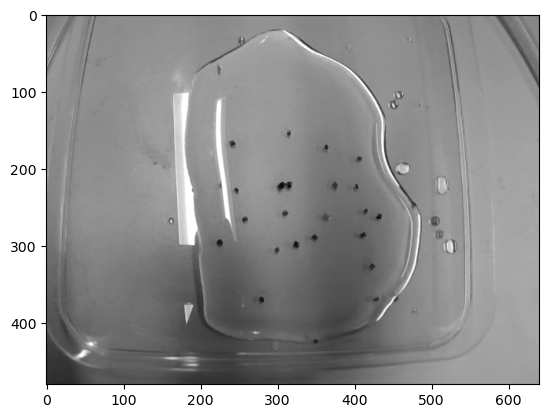

In [81]:
image = cv2.imread('Pictures/image7.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

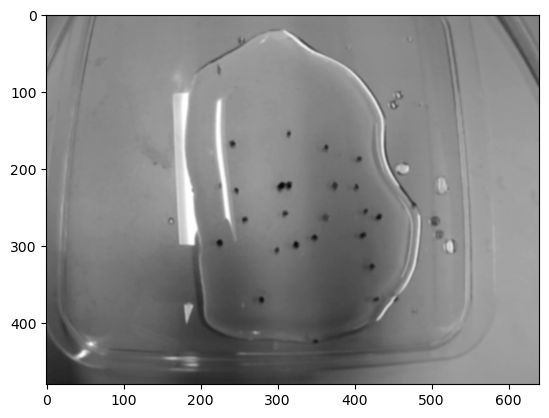

In [82]:
image_blur = cv2.GaussianBlur(gray_image, (5,5), 0)
if show_all:
    plt.imshow(image_blur)

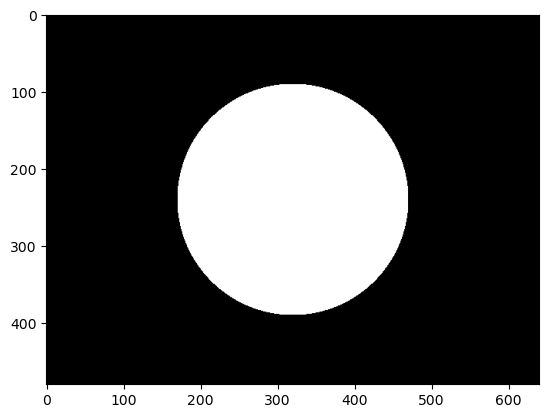

In [83]:
mask = np.zeros(image.shape[0:2], dtype='uint8')

for x in range(mask.shape[0]):
    for y in range(mask.shape[1]):
        if math.sqrt((x-mask.shape[0]/2)**2 + (y-mask.shape[1]/2)**2) < 150:
            mask[x, y] = 1
            
if show_all:
    plt.imshow(mask)

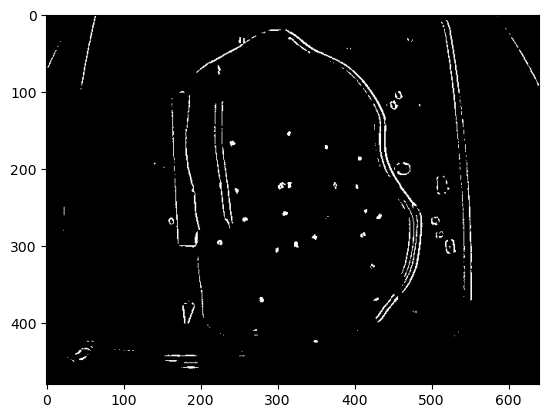

In [84]:
laplacien = cv2.adaptiveThreshold(image_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 4)
if show_all:
    plt.imshow(laplacien)

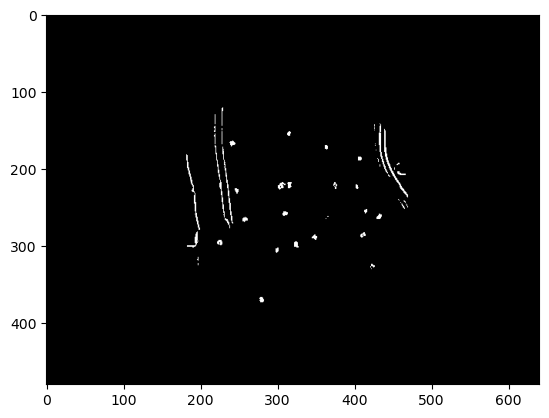

In [85]:
_, binary = cv2.threshold(laplacien, 5, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_and(binary, binary, mask=mask)
if show_all:
    plt.imshow(binary)

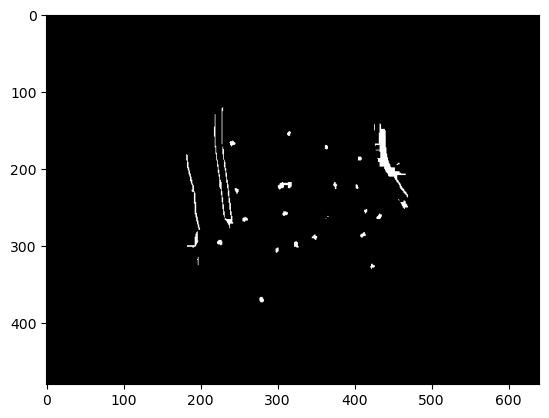

In [86]:
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(binary, kernel, iterations=2)
erroded = cv2.erode(dilated, kernel, iterations=2)
if show_all:
    plt.imshow(erroded)

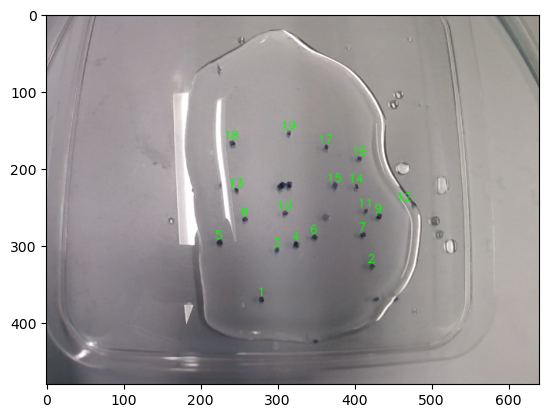

In [88]:
samples = []
out = image.copy()
num = 0
size_min = 8
size_max = 50

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.5
color = (0, 255, 0)
thickness = 1

elements = cv2.findContours(erroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
for i in range(len(elements)):
    area = cv2.contourArea(elements[i])
    if area > size_min and area < size_max:
        num += 1
        ((x, y), radius) = cv2.minEnclosingCircle(elements[i])
        size, _ = cv2.getTextSize(str(num), font, fontScale, thickness)
        out = cv2.putText(out, str(num), (int(x-size[0]/2),int(y-5)), font, 
                   fontScale, color, thickness, cv2.LINE_AA)
        
        
plt.imshow(out)   


# Results
Results correct but some false positives due to the light, overal detection about 90%